In [7]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [5]:
"""
Data load 
"""
df = pd.read_csv('abalone.csv')
df['Sex'] = df['Sex'].apply(lambda x : 1 if x == 'M' else (-1 if x == 'F' else 0))
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [21]:
"""
RF regressor fitting
"""
kf = KFold(n_splits=5, shuffle=True, random_state=1)
opt = []
for i in range(1, 150):
    rgr = RandomForestRegressor(random_state=1, n_estimators=i, n_jobs=4)
    ans = cross_val_score(rgr, X, y, cv=kf, scoring='r2').mean()
    opt.append((ans, i))
    

        
    
    




In [22]:
opt.sort()
minimal_trees = None
for pair in opt:
    if np.round(pair[0],decimals=2) > 0.52:
        minimal_trees = pair[1]
        break 
        
with open("w5s1.txt", "w") as fhand:
    fhand.write(str(minimal_trees))

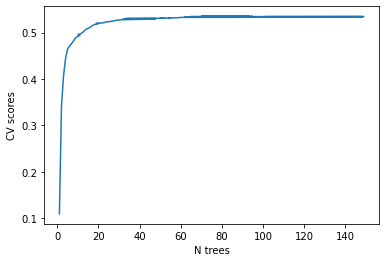

In [23]:
import matplotlib.pyplot as plt 

cv_scores = [x[0] for x in opt]
n_trees = [x[1] for x in opt]

plt.plot(n_trees, cv_scores)
plt.xlabel('N trees')
plt.ylabel('CV scores')
plt.show()